<a href="https://colab.research.google.com/github/1997MarsRover/Keras/blob/main/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


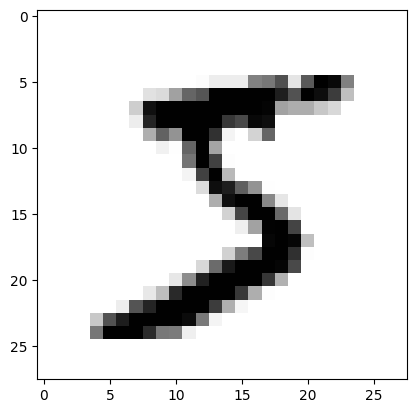

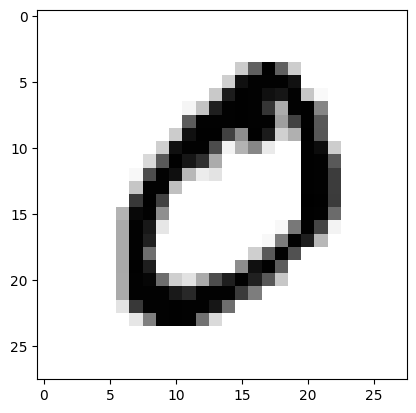

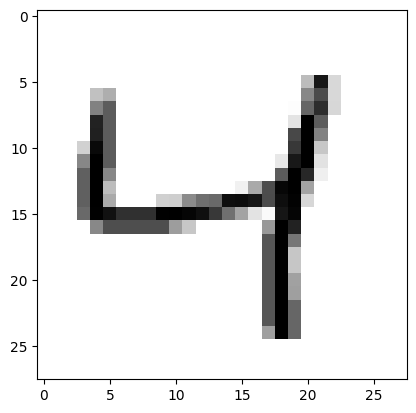

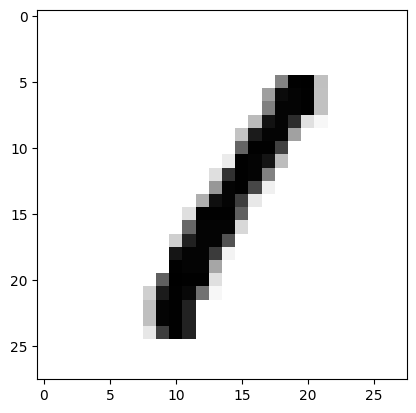

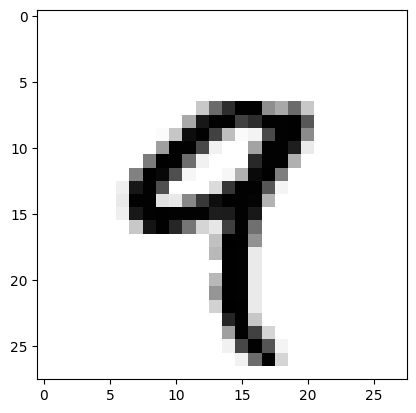

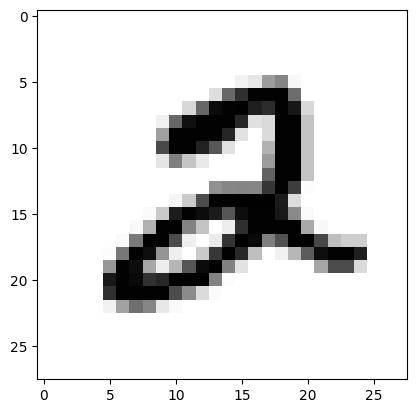

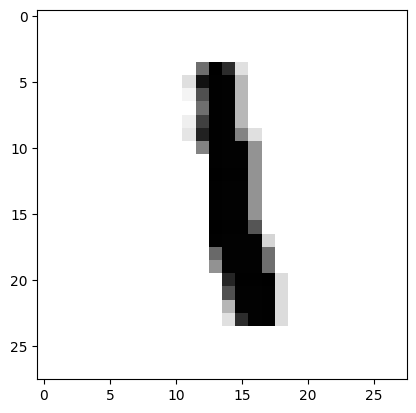

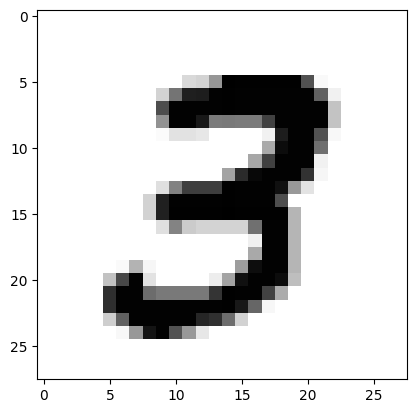

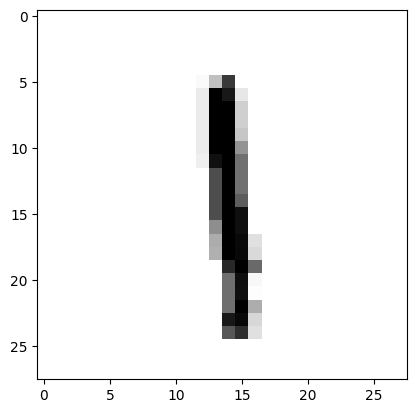

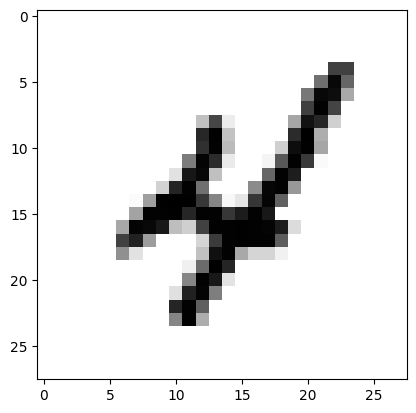

In [4]:
import matplotlib.pyplot as plt
for image in train_images[:10]:
  plt.imshow(image, cmap=plt.cm.binary)
  plt.show()




In [5]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2651 - accuracy: 0.9243
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9683
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0700 - accuracy: 0.9792
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - accuracy: 0.9851
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0382 - accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0290 - accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0218 - accuracy: 0.9936
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0160 - accuracy: 0.9959
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0095 - accuracy:

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9840
test_acc: 0.984000027179718


The test accuracy is lower than the training accuracy impying our model have overfitted on the training data.. So how would we go about fixing it?